In [1]:
import librosa as lr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
datasett='augmented_dataset/augmented_dataset'
pd.DataFrame(os.listdir(datasett),columns=['Files'])

,Files
0,bed
1,bird
2,cat
3,dog
4,down
5,eight
6,five
7,four
8,go
9,happy


In [3]:
def count(path):
    size=[]
    for file in os.listdir(path):
        size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=os.listdir(path)) 

In [4]:
tr=count(datasett)
tr

,Number Of Sample
bed,1356
bird,1346
cat,1378
dog,1474
down,1188
eight,1113
five,1092
four,2400
go,960
happy,1481


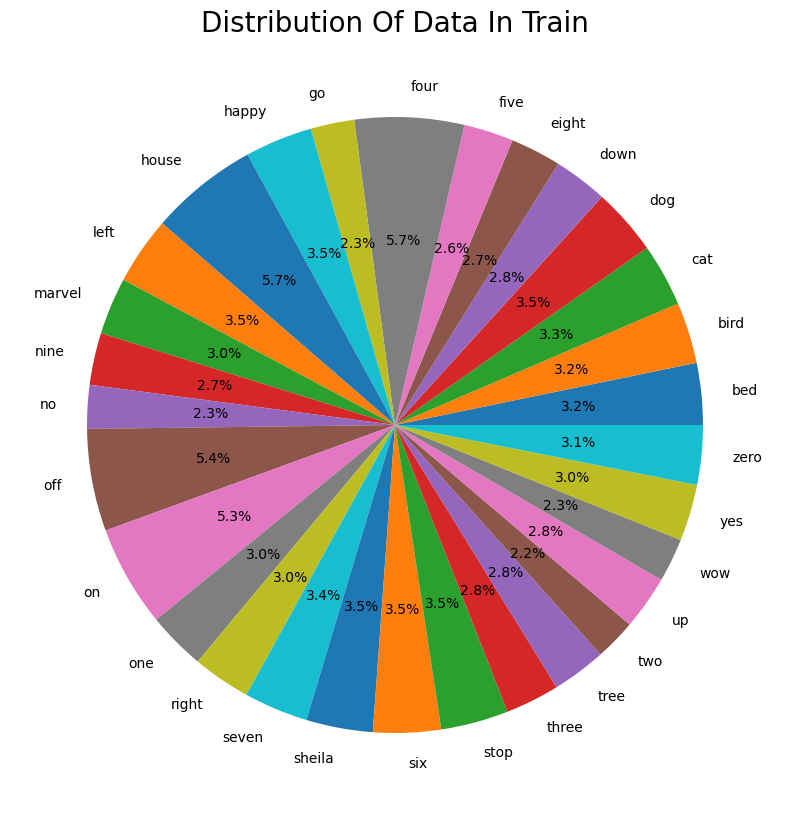

In [5]:
plt.figure(figsize=(10,10))
plt.pie(x='Number Of Sample',labels=os.listdir(datasett),autopct ='%1.1f%%',data=tr)
plt.title('Distribution Of Data In Train',fontsize=20)
plt.show()

Text(0, 0.5, 'Count')

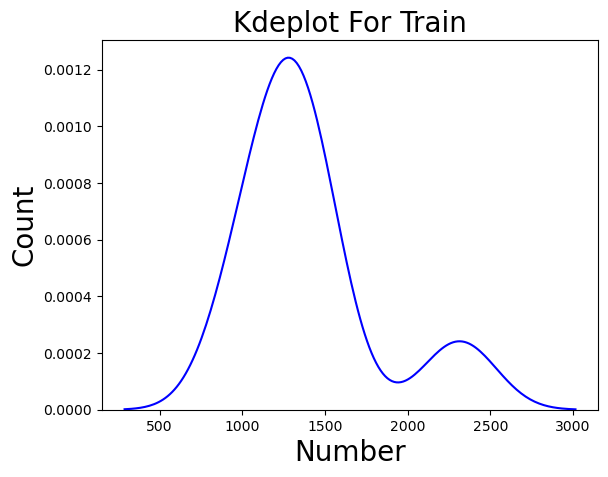

In [6]:
sns.kdeplot(tr['Number Of Sample'], color='blue')
plt.title('Kdeplot For Train', fontsize=20)
plt.xlabel('Number', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [7]:
import librosa
import numpy as np

def load_dataset(data_dir):
    dataset = []
    labels = []
    sample= []
    audio=[]
    categories = os.listdir(data_dir)
    
    for category in categories:
        category_dir = os.path.join(data_dir, category)
        for audio_file in os.listdir(category_dir):
            audio_path = os.path.join(category_dir, audio_file)
            audio_data, sample_rate  = librosa.load(audio_path, sr=16000)
            mfccs = librosa.feature.mfcc(y=audio_data, sr=16000)
            
            audio.append(audio_data)
            dataset.append(mfccs)
            labels.append(category)
            sample.append(sample_rate)
    
    return np.array(audio),np.array(dataset), np.array(labels), np.array(sample)

In [8]:
def waveform(data,sr,label):
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr)
    plt.suptitle(label)
    plt.title('Waveform plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
#MFCC features
def mfcc_v(mfccs,label):
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.suptitle(label)
    
#Mel-spectrogram
def Mel(data, sr):
    mel_spec = lr.feature.melspectrogram(y=data, sr=sr)
    return np.mean(mel_spec), mel_spec
def mel_v(mel_spec,label,sr):
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)
    
#zero_crossing_rate
def zero_crossing(data,sr):
    zcr = lr.feature.zero_crossing_rate(data)
    avg_zcr = sum(zcr[0])/len(zcr[0])
    print("Average zero-crossing rate:", avg_zcr)
    return zcr
def zero_crossing_v(zcr,label,data,sr):
    time = lr.times_like(zcr)
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr, alpha=0.5)
    plt.plot(time, zcr[0], color='r')
    plt.title('Zero-crossing rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.suptitle(label)

In [9]:
orgaudio,dataset, labels, sample = load_dataset(datasett)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


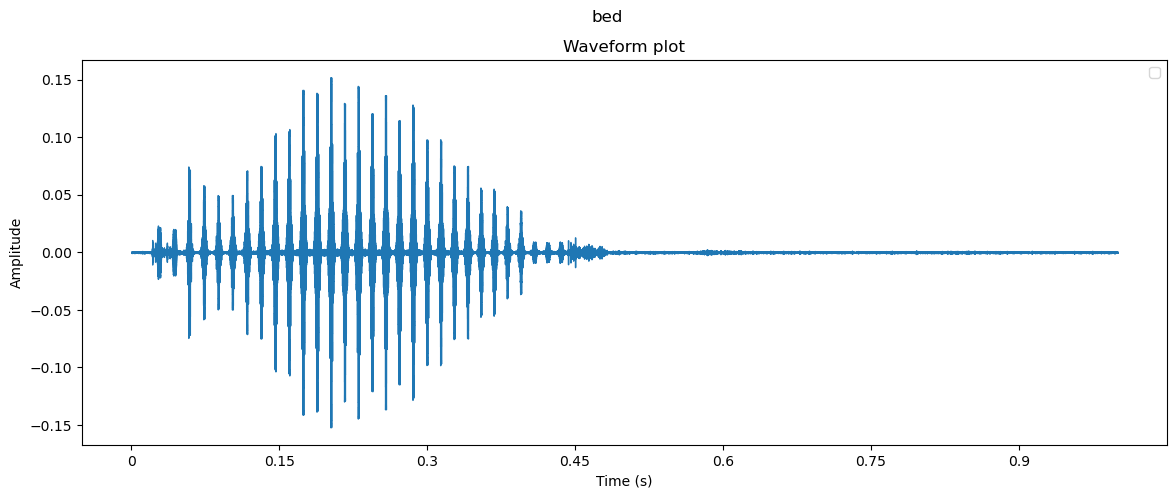

In [10]:
waveform(orgaudio[0],sample[0],labels[0])
plt.legend()
plt.show()

MFCCs Mean: -22.473103
MFCCs shape: (20, 32)


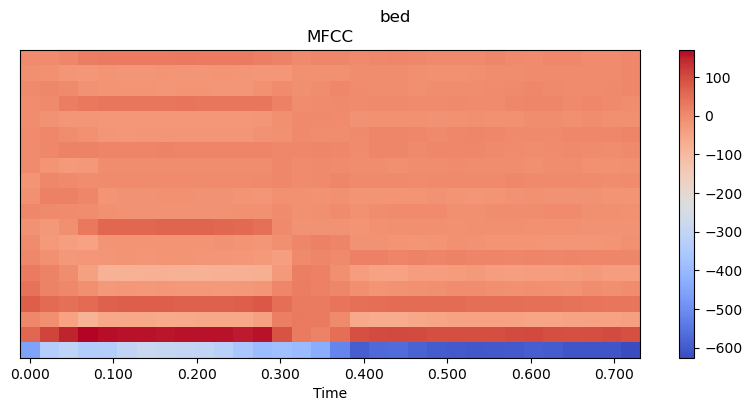

In [11]:
print('MFCCs Mean:', dataset[0].mean())
print('MFCCs shape:', dataset[0].shape)
mfcc_v(dataset[0],labels[0])

Mel Mean: 0.04585984
Mel : (128, 32)


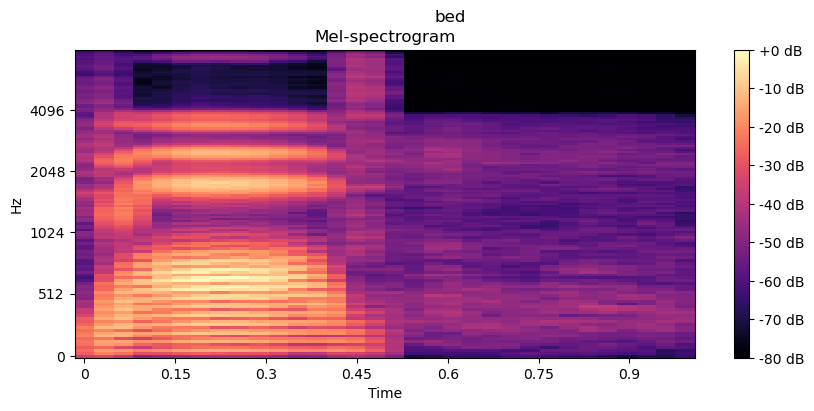

In [12]:
##Mel-spectrogram data[0]
mel_mean,mel=Mel(orgaudio[0],sample[0])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,labels[0],sample[0])

Average zero-crossing rate: 0.1768035888671875
Zcr: (1, 32)


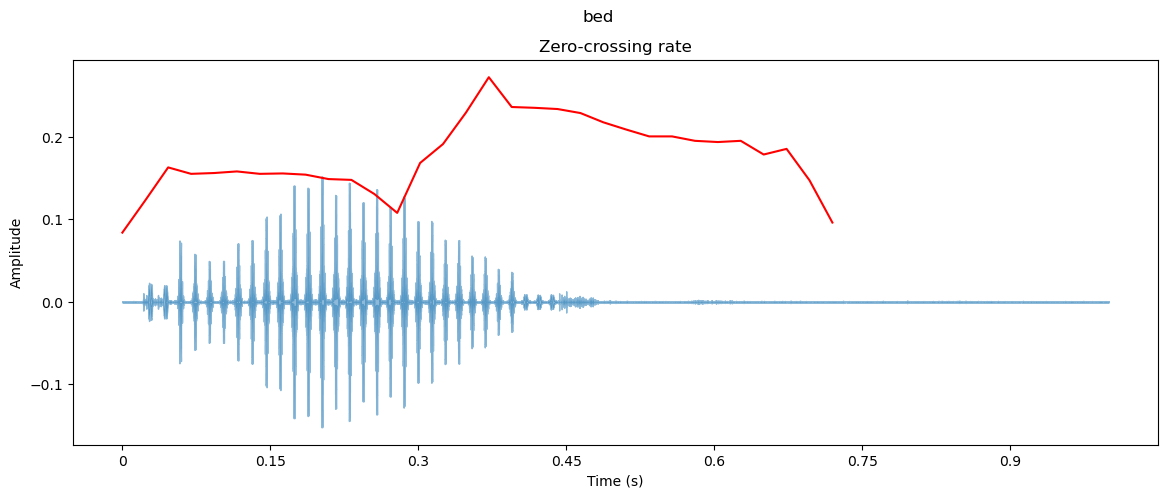

In [13]:
#zero_crossing data[0]
zcr=zero_crossing(orgaudio[0],sample[0])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,labels[0],orgaudio[0],sample[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


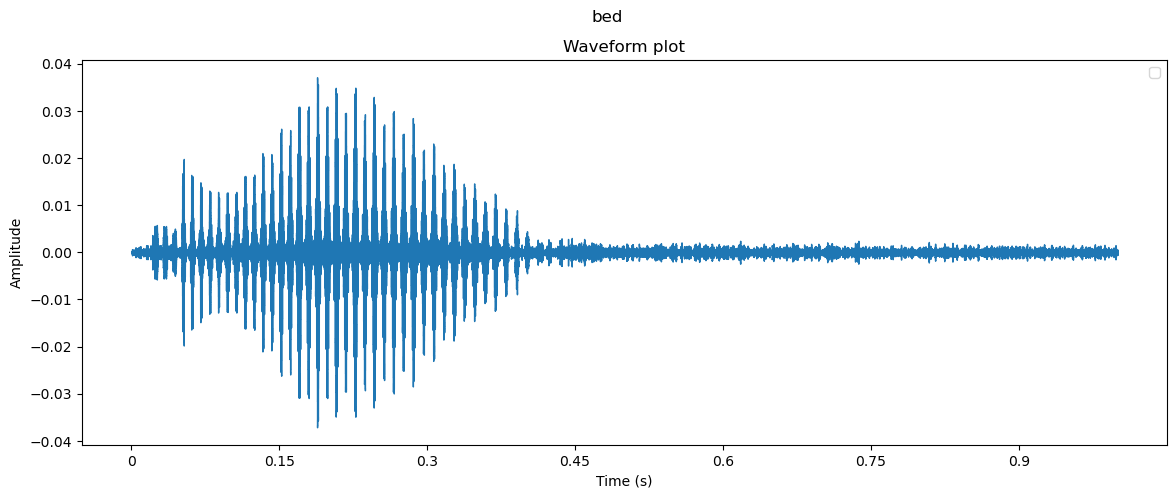

In [14]:
#waveform data[1000]
waveform(orgaudio[1000],sample[1000],labels[1000])
plt.legend()

MFCCs Mean: -22.473103
MFCCs shape: (20, 32)


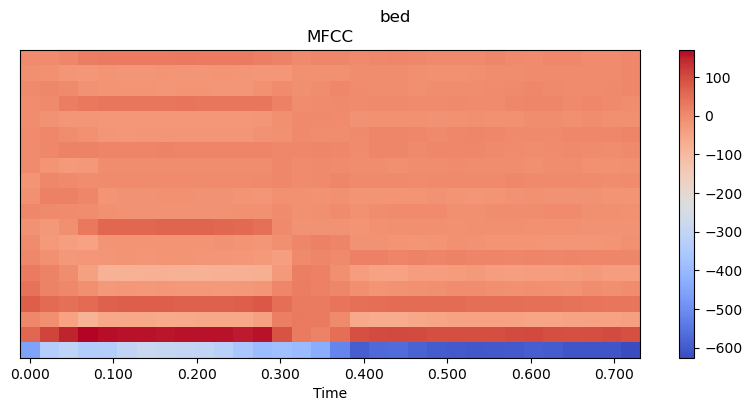

In [15]:
#MFCC data[1000]
print('MFCCs Mean:', dataset[0].mean())
print('MFCCs shape:', dataset[0].shape)
mfcc_v(dataset[0],labels[1000])

Mel Mean: 0.0037993134
Mel : (128, 32)


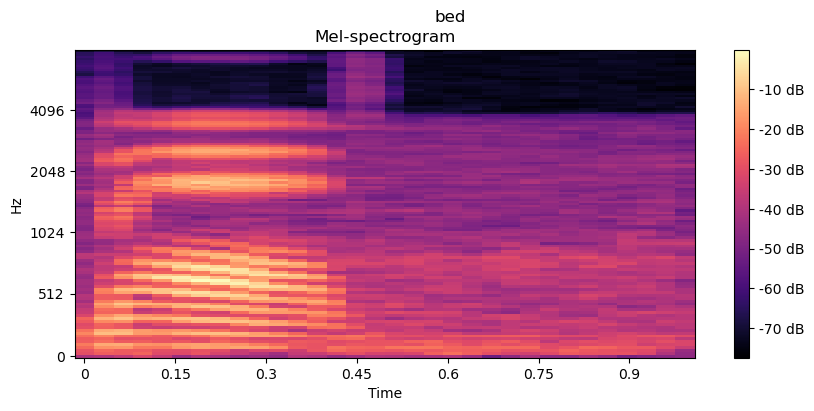

In [16]:
##Mel-spectrogram data[1000]
mel_mean,mel=Mel(orgaudio[1000],sample[1000])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,labels[1000],sample[1000])

Average zero-crossing rate: 0.1236572265625
Zcr: (1, 32)


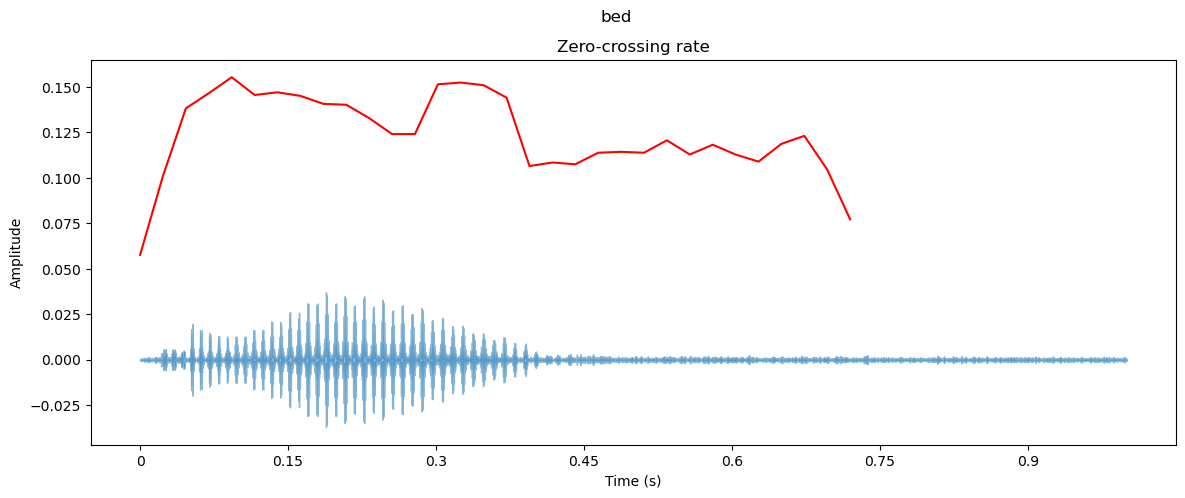

In [17]:
#zero_crossing data[1000]
zcr=zero_crossing(orgaudio[1000],sample[1000])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,labels[1000],orgaudio[1000],sample[1000])

In [18]:
df=pd.DataFrame()
df['Label'],df['sample']=labels,sample
df

,Label,sample
0,bed,16000
1,bed,16000
2,bed,16000
3,bed,16000
4,bed,16000
...,...,...
41844,zero,16000
41845,zero,16000
41846,zero,16000
41847,zero,16000


In [19]:
dataset.shape

(41849, 20, 32)

In [20]:
dataset1=np.array(dataset).reshape(41849,-1)

In [21]:
labels=np.array(labels)

In [22]:
labels.shape

(41849,)

In [23]:
dataset1.shape

(41849, 640)

In [24]:
dataset1=np.array(dataset1).reshape(-1,640,1)

In [25]:
dataset1.shape

(41849, 640, 1)

In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
labels=lb.fit_transform(labels)

In [27]:
labels

array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)

In [28]:
len(pd.unique(labels))

30

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
X_test.shape

(8370, 640, 1)

In [31]:
num_class=len(pd.unique(labels))

In [32]:
num_class

30

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
learning_rate_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5)

In [38]:
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization

model = keras.Sequential()
model.add(Conv1D(filters=8, kernel_size=13, activation='relu', input_shape=(640, 1)))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv1D(filters=32, kernel_size=9, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(30, activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 628, 8)            112       
                                                                 
 max_pooling1d (MaxPooling1  (None, 209, 8)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 209, 8)            0         
                                                                 
 batch_normalization (Batch  (None, 209, 8)            32        
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 199, 16)           1424      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 66, 16)            0

In [40]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, learning_rate_scheduler]
)


Epoch 1/30


837/837 [==============================] - 24s 23ms/step - loss: 3.2486 - accuracy: 0.1206 - val_loss: 2.0984 - val_accuracy: 0.3964 - lr: 0.0010
Epoch 2/30
837/837 [==============================] - 20s 24ms/step - loss: 2.1526 - accuracy: 0.3466 - val_loss: 1.2724 - val_accuracy: 0.6425 - lr: 0.0010
Epoch 3/30
837/837 [==============================] - 21s 25ms/step - loss: 1.6953 - accuracy: 0.4741 - val_loss: 1.0187 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 4/30
837/837 [==============================] - 21s 25ms/step - loss: 1.4579 - accuracy: 0.5419 - val_loss: 0.7995 - val_accuracy: 0.7697 - lr: 0.0010
Epoch 5/30
837/837 [==============================] - 22s 26ms/step - loss: 1.3104 - accuracy: 0.5838 - val_loss: 0.6630 - val_accuracy: 0.8096 - lr: 0.0010
Epoch 6/30
837/837 [==============================] - 20s 24ms/step - loss: 1.1868 - accuracy: 0.6243 - val_loss: 0.5656 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 7/30
837/837 [==============================] - 2

In [33]:
import pickle
model = pickle.load(open("speechrecog.pkl", 'rb'))

In [34]:
loss,acc=model.evaluate(X_test,y_test)
print('Loss is :',loss)
print('ACC is :',acc)



262/262 [==============================] - 3s 7ms/step - loss: 0.1729 - accuracy: 0.9593
Loss is : 0.17289851605892181
ACC is : 0.9592592716217041


In [35]:
from tensorflow.keras.models import Model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('conv1d_3') .output)

In [36]:
featuress = feature_extractor.predict(dataset1)

1308/1308 [==============================] - 8s 6ms/step


In [37]:
featuress.shape

(41849, 13, 64)

In [38]:
new_feature= featuress.reshape(featuress.shape[0],(featuress.shape[1]*featuress.shape[2]))

In [39]:
new_feature.shape

(41849, 832)

In [40]:
df = pd.DataFrame(new_feature)
df['label'] = labels
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,label
0,0.0,1.906648,2.269624,0.692751,0.0,0.0,0.0,2.065994,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.068363,0.000000,0.000000,0.0,0.0,0.0,3.451805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
df.to_csv('extractedfeatures.csv', index=False)

In [42]:
from sklearn.model_selection import train_test_split
X = df.drop(['label'], axis=1)
y = df.label
xxtrain, xxtest, yytrain, yytest = train_test_split(X, y, test_size=0.2)

In [43]:
yytest.shape

(8370,)

In [44]:
yytest

10398     7
25798    17
37738    26
36902    25
30419    20
         ..
23799    16
18412    12
22334    15
38034    26
37274    26
Name: label, Length: 8370, dtype: int64

In [45]:
xxtest.shape

(8370, 832)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0, penalty='l2', C=0.1)
classifier1.fit(xxtrain, yytrain)

C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, random_state=0)

In [47]:
pred = classifier1.predict(xxtrain.values)

In [48]:
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(yytrain, pred)
print("Accuracy:", accuracy)
f1=f1_score(yytrain, pred, average='micro')
print("f1 score",f1)

Accuracy: 0.9988350906538427
f1 score 0.9988350906538427


In [49]:
predtest = classifier1.predict(xxtest.values)
accuracy = accuracy_score(yytest, predtest)
print("Accuracy:", accuracy)

Accuracy: 0.9869772998805257


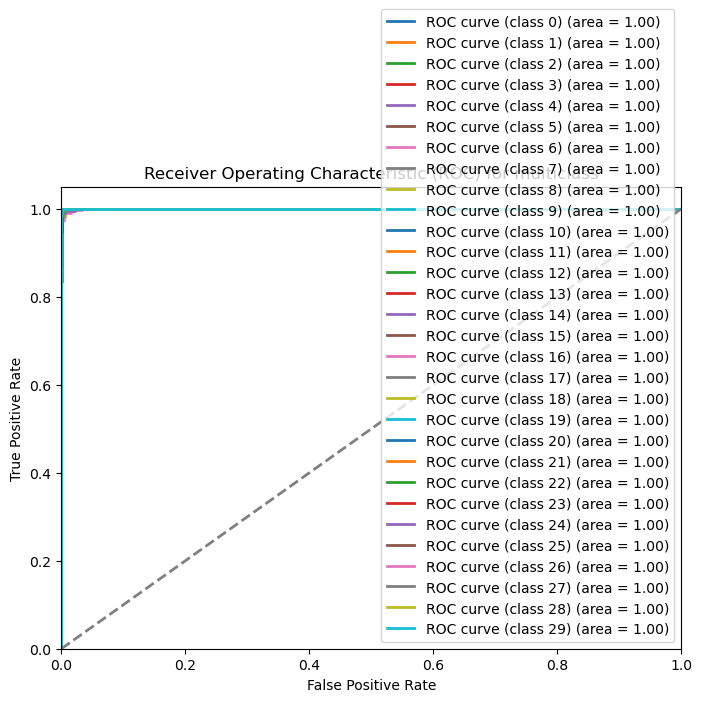

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = classifier1.predict_proba(xxtest.values)
n_classes = y_pred_proba.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yytest == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multiclass')
plt.legend(loc="lower right")
plt.show()


In [52]:
from sklearn.metrics import roc_auc_score,log_loss
y_pred_proba = classifier1.predict_proba(xxtest.values)
loss = log_loss(yytest, y_pred_proba)
print("Binary Cross-Entropy Loss:", loss)

Binary Cross-Entropy Loss: 0.05180659040081635


C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [53]:
from sklearn.metrics import roc_auc_score
y_pred_proba = classifier1.predict_proba(xxtest.values)
n_classes = y_pred_proba.shape[1]
auc_scores = []
for i in range(n_classes):
    auc_score = roc_auc_score(yytest == i, y_pred_proba[:, i])
    auc_scores.append(auc_score)
macro_auc = sum(auc_scores) / n_classes
print("Macro-average AUC:", macro_auc)

Macro-average AUC: 0.9999444415928767


In [54]:
from sklearn.metrics import classification_report
report = classification_report(yytest, predtest)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       267
           1       0.99      0.99      0.99       275
           2       0.99      1.00      0.99       250
           3       0.99      0.99      0.99       283
           4       0.99      0.97      0.98       238
           5       0.99      0.98      0.98       233
           6       0.98      0.99      0.99       213
           7       0.98      0.99      0.98       479
           8       0.97      0.96      0.97       166
           9       1.00      1.00      1.00       277
          10       1.00      1.00      1.00       464
          11       1.00      0.98      0.99       307
          12       1.00      0.99      0.99       270
          13       0.99      0.98      0.98       249
          14       0.98      0.97      0.98       174
          15       0.99      0.99      0.99       447
          16       0.97      0.97      0.97       486
    

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

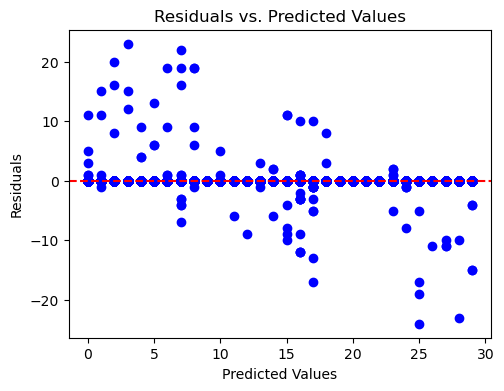

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
y_pred = predtest
residuals = yytest - y_pred
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = []
for i in range(1, len(xxtrain) + 1):
    y_pred_train = classifier1.predict(xxtrain[:i])
    train_accuracy.append(accuracy_score(yytrain[:i], y_pred_train))
plt.plot(train_accuracy)
plt.title('Training Accuracy Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.show()


C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

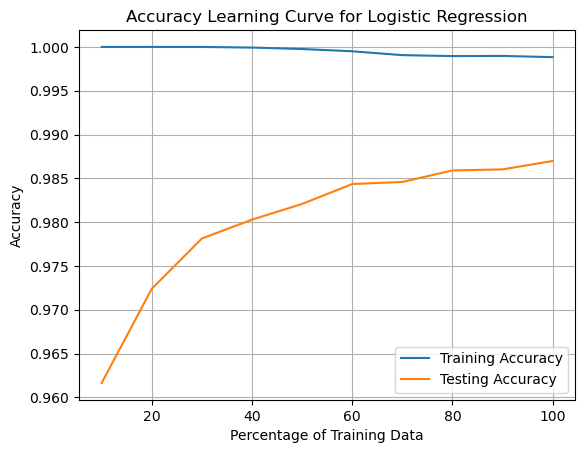

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define the range of training set sizes you want to consider
training_sizes = np.linspace(0.1, 1.0, 10)  # Consider 10 increments from 10% to 100% of training data

train_acc = []
test_acc = []

for size in training_sizes:
    # Determine the number of samples to use
    num_samples = int(size * len(xxtrain))
    
    # Select a subset of the training data
    X_train_subset = xxtrain[:num_samples]
    y_train_subset = yytrain[:num_samples]
    
    # Train the logistic regression model
    classifier = LogisticRegression(random_state=0, penalty='l2', C=0.1)
    classifier.fit(X_train_subset, y_train_subset)
    
    # Predictions on the training set
    y_train_pred = classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, y_train_pred)
    train_acc.append(train_accuracy)
    
    # Predictions on the testing set
    y_test_pred = classifier.predict(xxtest)
    test_accuracy = accuracy_score(yytest, y_test_pred)
    test_acc.append(test_accuracy)

# Plotting the learning curve
plt.plot(training_sizes * 100, train_acc, label='Training Accuracy')
plt.plot(training_sizes * 100, test_acc, label='Testing Accuracy')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Learning Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

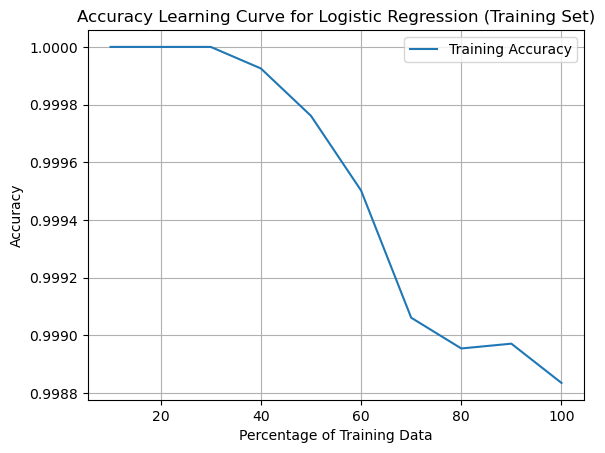

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define the range of training set sizes you want to consider
training_sizes = np.linspace(0.1, 1.0, 10)  # Consider 10 increments from 10% to 100% of training data

train_acc = []

for size in training_sizes:
    # Determine the number of samples to use
    num_samples = int(size * len(xxtrain))
    
    # Select a subset of the training data
    X_train_subset = xxtrain[:num_samples]
    y_train_subset = yytrain[:num_samples]
    
    # Train the logistic regression model
    classifier = LogisticRegression(random_state=0, penalty='l2', C=0.1)
    classifier.fit(X_train_subset, y_train_subset)
    
    # Predictions on the training set
    y_train_pred = classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, y_train_pred)
    train_acc.append(train_accuracy)

# Plotting the learning curve
plt.plot(training_sizes * 100, train_acc, label='Training Accuracy')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Learning Curve for Logistic Regression (Training Set)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

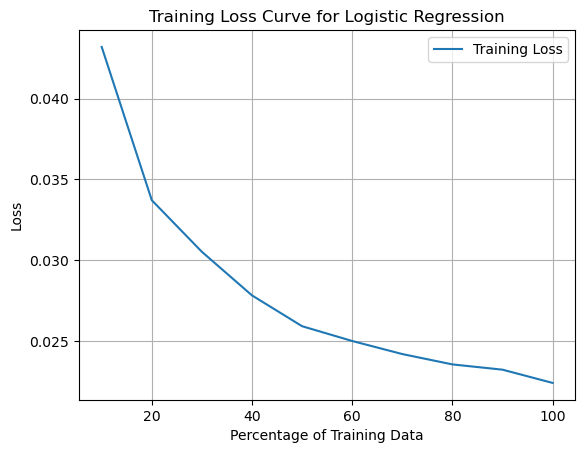

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Define the range of training set sizes you want to consider
training_sizes = np.linspace(0.1, 1.0, 10)  # Consider 10 increments from 10% to 100% of training data

train_loss = []

for size in training_sizes:
    # Determine the number of samples to use
    num_samples = int(size * len(xxtrain))
    
    # Select a subset of the training data
    X_train_subset = xxtrain[:num_samples]
    y_train_subset = yytrain[:num_samples]
    
    # Train the logistic regression model
    classifier = LogisticRegression(random_state=0, penalty='l2', C=0.1)
    classifier.fit(X_train_subset, y_train_subset)
    
    # Predictions on the training set
    y_train_pred_prob = classifier.predict_proba(X_train_subset)
    
    # Calculate the log loss on the training set
    loss = log_loss(y_train_subset, y_train_pred_prob)
    train_loss.append(loss)

# Plotting the learning curve
plt.plot(training_sizes * 100, train_loss, label='Training Loss')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Loss')
plt.title('Training Loss Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

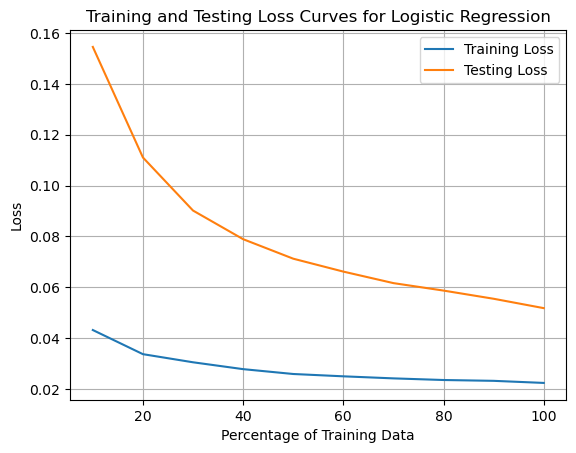

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Define the range of training set sizes you want to consider
training_sizes = np.linspace(0.1, 1.0, 10)  # Consider 10 increments from 10% to 100% of training data

train_loss = []
test_loss = []

for size in training_sizes:
    # Determine the number of samples to use
    num_samples = int(size * len(xxtrain))
    
    # Select a subset of the training data
    X_train_subset = xxtrain[:num_samples]
    y_train_subset = yytrain[:num_samples]
    
    # Train the logistic regression model
    classifier = LogisticRegression(random_state=0, penalty='l2', C=0.1)
    classifier.fit(X_train_subset, y_train_subset)
    
    # Predictions on the training set
    y_train_pred_prob = classifier.predict_proba(X_train_subset)
    
    # Calculate the log loss on the training set
    train_loss.append(log_loss(y_train_subset, y_train_pred_prob))
    
    # Predictions on the testing set
    y_test_pred_prob = classifier.predict_proba(xxtest)
    
    # Calculate the log loss on the testing set
    test_loss.append(log_loss(yytest, y_test_pred_prob))

# Plotting the learning curves
plt.plot(training_sizes * 100, train_loss, label='Training Loss')
plt.plot(training_sizes * 100, test_loss, label='Testing Loss')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()
